---

<p align="center">
  <!---<img src="https://www.estudiaradistancia.com.ar/logos/original/logo-universidad-de-buenos-aires.webp" height=80 />--->
  <img src="https://confedi.org.ar/wp-content/uploads/2020/09/fiuba_logo.jpg" height="180"/>
</p>
<br>

---

<p align="center">
<font size="+3">
[75.06] Organizacion de Datos - Curso Rodriguez
Trabajo Práctico I
<br>
Análisis de propiedades en venta - Dataset Properati
Segundo Cuatrimestre - 2022
</font>
</p>
<br>

---

<p align="center">
<font size="+3">
GRUPO 3
</font>
<font size="+2">
INTEGRANTES
</font>
<font size="+1">
Ramiro Gestoso,  
Facundo Monpelat,
Paula Bruck,
Miguel Vasquez,
Gaston Avila
</font>

</p>

<br>
<br>

---

## Introducción 

En el presente Trabajo Practico se busca aplicar las siguientes técnicas:
- Análisis exploratorio.
- Preprocesamiento de datos.
- Agrupamiento (Clustering).
- Clasificación en base a entrenamiento y predicción.
- Uso y decisión de modelos para regresión.

Todo ello utilizando el conjunto de datos provisto por la empresa Properati correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021.

## Índice de contenidos

0. Imports y obtención de dataset
1. Análisis Exploratorio y Preprocesamiento de Datos
    a) Exploración Inicial.
    b) Datos Faltantes
    c) Valores atípicos
    d) Reducción de la dimensionalidad
2. Agrupamiento
3. Clasificación
    a) Construcción de variable target
    b) Entrenamiento y Predicción
     - Modelo 1 : Árbol de decisión
     - Modelo 2: Random Forest
     - Modelo 3: a elección
4. Regresión
    - Modelo 1: KNN
    - Modelo 2: XGBoost
    - Modelo 3: a elección
5. Conclusiones

## 0. Imports y obtención de dataset  

Sección con imports y definiciones auxiliares iniciales para manipulación general del dataset

In [1]:
!ls

df_preprocesado_v1.csv	properati_argentina_2021.csv


Importamos las bibliotecas a utilizar a lo largo de nuestro trabajo 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

Cargamos el dataset de properati

In [3]:
ds = pd.read_csv('properati_argentina_2021.csv')

## 1. Análisis exploratorio y preprocesamiento de datos

### a) Exploración inicial

Se realiza un un acercamiento inicial general del dataset observando sus distintas caracteristivas principales

En principio se observa la cantidad de observaciones y features contenidas:

In [4]:
shape = ds.shape
print("Filas: %d Columnas: %d" % (shape[0], shape[1]))

Filas: 460154 Columnas: 20


In [5]:
ds.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Obtenemos informacion relevante del dataset y sus columnas

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Clasificando las variables presentes en este dataset las dividiremos en :
- Cualitativas(categoricas):
    - Ordinales 
    - Nominales
- Cuantitativas(numericas):
    - Discretas (Sus modalidades son valores enteros. )
    - Continuas (Sus modalidades son valores reales. )

Las variables **cuantitativas** observadas a partir del dataset son:
- **latitud (continua)** 
- **longitud (continua)**
- **property_rooms (ordinal)**: Ambientes de la propiedad
- **property_bedrooms (ordinal)**: Habitaciones (dormitorios) de la propiedad
- **property_surface_total (continua)**: Superficie total que ocupa la propiedad
- **property_surface_covered (continua)**: Superficie de terreno que cubre la propiedad
- **property_price (continua)**: Precio de la propiedad
- **place_l6** (Más adelante se detalla, ya que esta columna se encuentra mal categorizada por su dtype)

A continuacion se muestran las medidas de resumen de las variables mencionadas:

In [7]:
variables_cuantitativas = [
    'latitud',
    'longitud',
    'property_rooms',
    'property_bedrooms',
    'property_surface_total',
    'property_surface_covered',
    'property_price'
    ]
ds[variables_cuantitativas].describe()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


En cuanto a variables **cualitativas**, se tienen:
- **start_date (ordinal)**: Fecha de alta del aviso
- **end_date (ordinal)**: Fecho de baja del aviso
- **created_on (ordinal)**: Fecha de alta de la primera versión del aviso
(Nota de las anteriores: si bien por defecto vienen en formato string, serán convertidos a tipo *date* posteriormente)
- **operation (nominal)**: Tipo de operación (Venta, Alquiler)
- **place_l2 (nominal)**: Nivel de division administrativa 2, correspondiente a provincia
- **place_l3 (nominal)**: Nivel de division administrativa 3, correspondiente a ciudad
- **place_l4 (nominal)**: Nivel de division administrativa 4, correspondiente a barrio
- **place_l5 (nominal)**: Nivel de division administrativa 5. No tiene una equivalencia definida por documentación.
- **property_type (nominal)**: Tipo de propiedad (Casa, Departamento, PH)
- **property_currency (nominal)**: Moneda correspondiente al precio publicado
- **property_title (nominal)**: Titulo del anuncio


### Filtramos las filas por aquellas que se ajusten a lo pedido en el enunciado

* property_type: Casa, PH o Departamento
* property_currency: USD
* operation: Venta
* place_l2 (provincia): Capital Federal

In [8]:
print('Property types')
print(ds['property_type'].value_counts().index.tolist())
print('Property currencies')
print(ds['property_currency'].value_counts().index.tolist())
print('Operations')
print(ds['operation'].value_counts().index.tolist())
print('Provincies')
print(ds['place_l2'].value_counts().index.tolist())

Property types
['Departamento', 'Casa', 'Lote', 'PH', 'Local comercial', 'Oficina', 'Otro', 'Cochera', 'Depósito', 'Casa de campo']
Property currencies
['USD', 'ARS', 'UYU', 'PEN', 'COP']
Operations
['Venta', 'Alquiler', 'Alquiler temporal']
Provincies
['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba', 'Buenos Aires Costa Atlántica', 'Neuquén', 'Montevideo', 'Buenos Aires Interior', 'Maldonado', 'Mendoza', 'Río Negro', 'Tucumán', 'Colonia', 'Salta', 'Entre Ríos', 'San Juan', 'La Pampa', 'Canelones', 'Chubut', 'San Luis', 'Misiones', 'Florida', 'Jujuy', 'Corrientes', 'Michigan', 'Chaco', 'Rocha', 'Tierra Del Fuego', 'Santiago Del Estero', 'Santa Catarina', 'Santa Cruz', 'Rio Grande do Norte', 'Maryland', 'Catamarca', 'Miami', 'La Rioja', 'Rio de Janeiro', 'Pennsylvania', 'Formosa', 'California', 'São Paulo']


Analizando los valores que toman las variables que utilizaremos, podemos afirmar que no se excluyen valores que deban entrar en la categoría pensada.

Procedemos entonces a realizar un primer filtro del dataset:

In [9]:
property_type_cond = ds['property_type'].isin(['Casa', 'PH','Departamento'])
property_currency_cond = ds['property_currency']  == 'USD'
operation_cond = ds['operation'] == 'Venta'
location_cond = ds['place_l2'] == 'Capital Federal' # segun documentacion "place_l2" es la provincia

ds_properati = ds[property_type_cond & property_currency_cond & operation_cond & location_cond]
ds_properati.reset_index(drop=True, inplace=True)
ds_properati.shape

(94249, 20)

In [10]:
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Analizamos si existen filas duplicadas:

In [11]:
print(f'Cantidad de filas duplicadas: {ds_properati.duplicated().sum()}')

Cantidad de filas duplicadas: 0


Convertimos las fechas a tipo *date* para su utilización:

In [12]:
ds_properati['start_date'] = pd.to_datetime(ds_properati['start_date'], errors='coerce')
ds_properati['end_date'] = pd.to_datetime(ds_properati['end_date'], errors='coerce')
ds_properati['created_on'] = pd.to_datetime(ds_properati['created_on'], errors='coerce')

Verificamos que la conversion se haya realizado correctamente

In [13]:
ds_properati.dtypes.loc[['start_date', 'end_date', 'created_on']]

start_date    datetime64[ns]
end_date      datetime64[ns]
created_on    datetime64[ns]
dtype: object

### Variables irrelevantes

Considerando que la única utilidad que tiene la columna ID, para nuestro caso de estudio, es para el uso del archivo de descripciones, la consideramos irrelevante. A su vez tambien podemos agregar, dentro de esta categoria, a "place_l5" y "place_l6" que tienen todos, o casi todos sus datos incompletos, adicionado a que, según el contexto del problema, se trata de niveles de división territorial administrativa de los cuales no se brinda información en la documentación del dataset.

In [14]:
ds_properati.drop(['id', 'place_l5', 'place_l6'], axis=1, inplace = True)

### Gráficos de variables

Graficamos algunas variables cualitativas que creemos que se pueden interpretar bien mediante graficos

Text(0, 0.5, 'Property quantity')

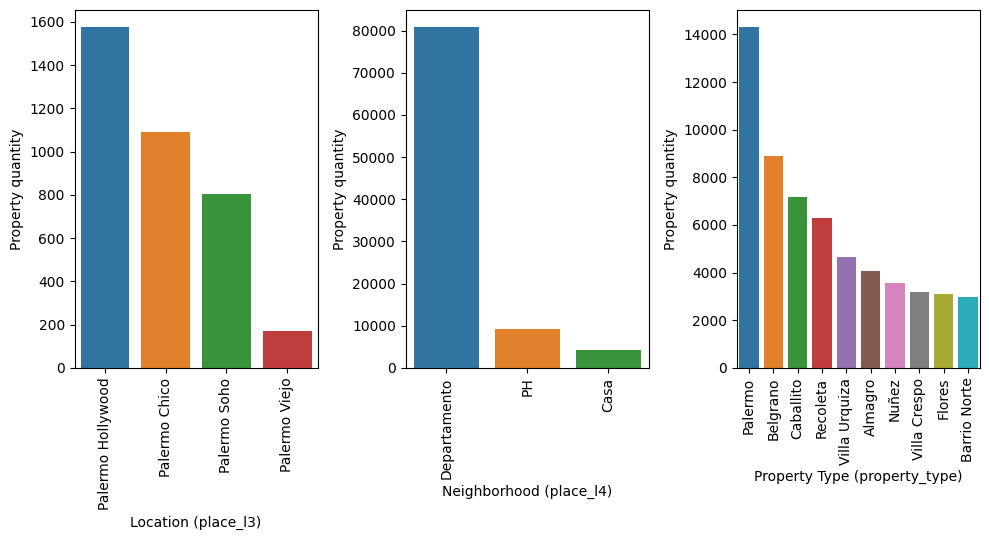

In [15]:
#Grafico boxplots 

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)

ciudades = ds_properati['place_l3'].value_counts().head(10)
sns.barplot(x=ciudades.index, y=ciudades.values)
plt.sca(ax[0])
plt.xlabel('Location (place_l3)')
plt.xticks(rotation=90)
plt.ylabel("Property quantity")
  
barrios = ds_properati['place_l4'].value_counts().head(10)
sns.barplot(x=barrios.index, y=barrios.values)
plt.sca(ax[1])
plt.xlabel('Neighborhood (place_l4)')
plt.xticks(rotation=90)
plt.ylabel("Property quantity")

types = ds_properati['property_type'].value_counts()
sns.barplot(x=types.index, y=types.values)
plt.sca(ax[2])
plt.xlabel('Property Type (property_type)')
plt.xticks(rotation=90)
plt.ylabel("Property quantity")

  

Graficamos las variables cuantitavias

In [16]:
rooms=ds_properati[ds_properati['property_rooms'].gt(0)].value_counts()
rooms.value_counts()

1    2249
2      14
4       1
3       1
dtype: int64

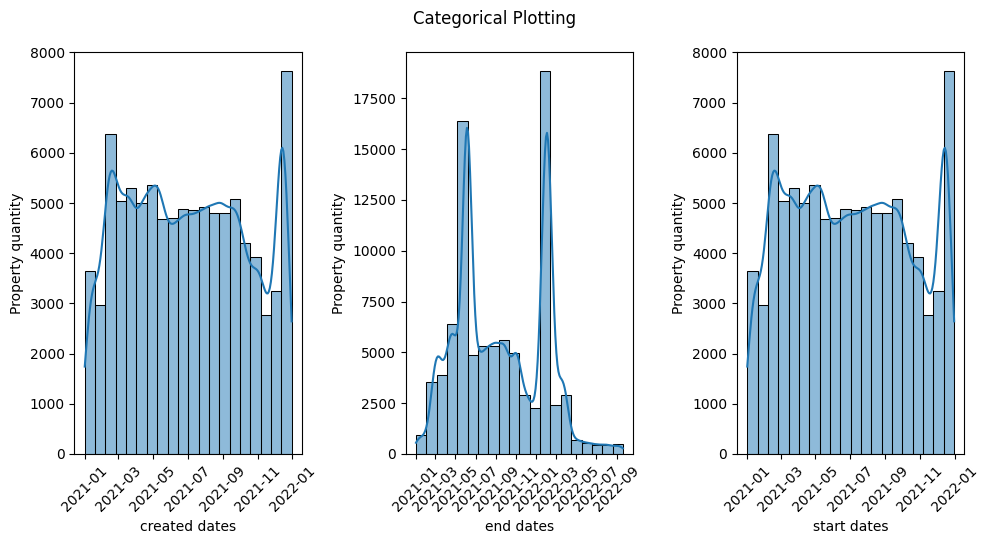

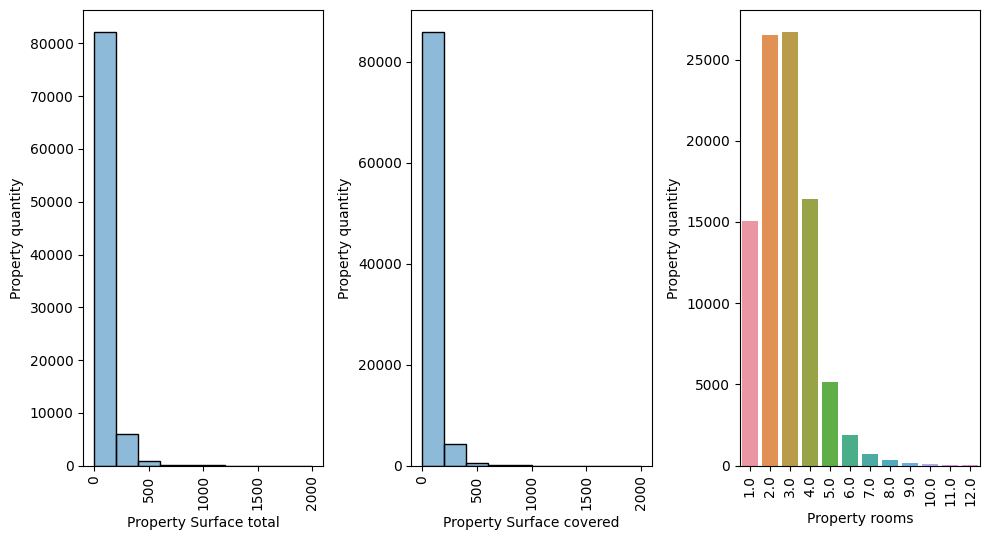

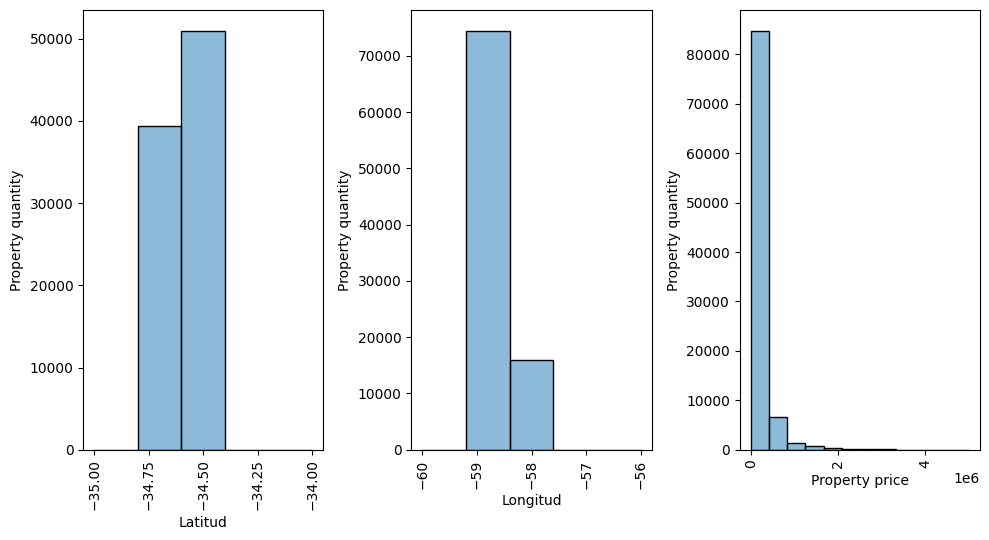

In [17]:
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Categorical Plotting')

sns_hist=sns.histplot(bins=20, data=ds_properati['start_date'], kde=True, alpha = 0.5).set(xlabel="start dates",ylabel="Property quantity")
plt.sca(ax[0])
plt.xticks(rotation=45)


sns_hist=sns.histplot(bins=20, data=ds_properati['created_on'], kde=True, alpha = 0.5).set(xlabel="created dates",ylabel="Property quantity")
plt.sca(ax[1])
plt.xticks(rotation=45)


sns_hist=sns.histplot(bins=20, data=ds_properati['end_date'], kde=True, alpha = 0.5).set(xlabel="end dates",ylabel="Property quantity")
plt.sca(ax[2])
plt.xticks(rotation=45)


fig.show()

fig, ax = plt.subplots(1,3)

rooms=ds_properati['property_rooms'].value_counts().head(12)
sns.barplot(x=rooms.index, y=rooms.values)
plt.xlabel("Property rooms")
plt.ylabel("Property quantity")
plt.sca(ax[0])
plt.xticks(rotation=90)


sns_hist=sns.histplot(bins=10, binrange=(0,2e3), data=ds_properati['property_surface_total'], alpha=0.5).set(xlabel="Property Surface total",ylabel="Property quantity")
plt.sca(ax[1])
plt.xticks(rotation=90)



sns_hist=sns.histplot(bins=10, binrange=(0,2e3), data=ds_properati['property_surface_covered'], alpha=0.5).set(xlabel="Property Surface covered",ylabel="Property quantity")
plt.sca(ax[2])
plt.xticks(rotation=90)


fig.show()
fig, ax = plt.subplots(1,3)
sns_hist=sns.histplot(bins=12, binrange=(0,5e6), data=ds_properati['property_price'], alpha=0.5).set(xlabel="Property price",ylabel="Property quantity")
plt.sca(ax[0])
plt.xticks(rotation=90)


sns_hist=sns.histplot(bins=5, binrange=(-35,-34), data=ds_properati['latitud'], alpha=0.5).set(xlabel="Latitud",ylabel="Property quantity")
plt.sca(ax[1])
plt.xticks(rotation=90)


sns_hist=sns.histplot(bins=5, binrange=(-60,-56), data=ds_properati['longitud'], alpha=0.5).set(xlabel="Longitud",ylabel="Property quantity")
plt.sca(ax[2])
plt.xticks(rotation=90)


fig.show()


## Analisis de correlacion de variables

<AxesSubplot:>

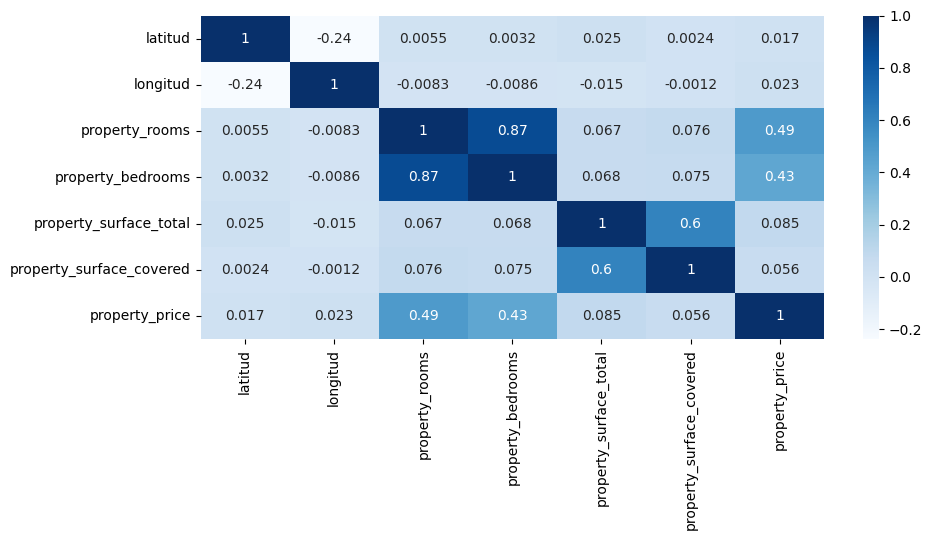

In [18]:
sns.heatmap(data=ds_properati.corr(), annot=True, cmap='Blues')

### Pares de variables con correlacion considerable:

* property_rooms & property_bedrooms -> correlacion positiva

* property_surface_covered & property_surface_total -> correlacion positiva

* property_rooms & property_price -> correlacion positiva

* property_bedrooms & property_price -> correlacion positiva

En todos tiene sentido que exista una correlacion. La cantidad de 'bedrooms' siempre va a estar limitada superiormente por la cantidad de 'rooms'. Algo parecido sucede con la superficie cubierta sobre la superficie total. Nunca se prodrá cubrir mas que el total. Tambien asi, los precios de las propiedades van a estar determinados, en parte, por la cantidad de ambientes (teniendo en cuenta habitaciones).

Estas condiciones explican la razon de la correlación y por qué tienen sentido.

Sin embargo, mirando los graficos de dispersion, podemos observar que algunas de estas "reglas" no se cumplen, lo que conduce a posibles valores atipicos, ya que no tienen sentido (aquellos puntos que estén por encima de la recta verde). Por ejemplo, en el segundo grafico podemos ver que hay casos de superficie cubierta mayor a la superficie total, lo cual no tiene sentido. Algo parecido pasa con el primer grafico.

Todos estos aspectos se analizarán en la sección de valores atipicos.

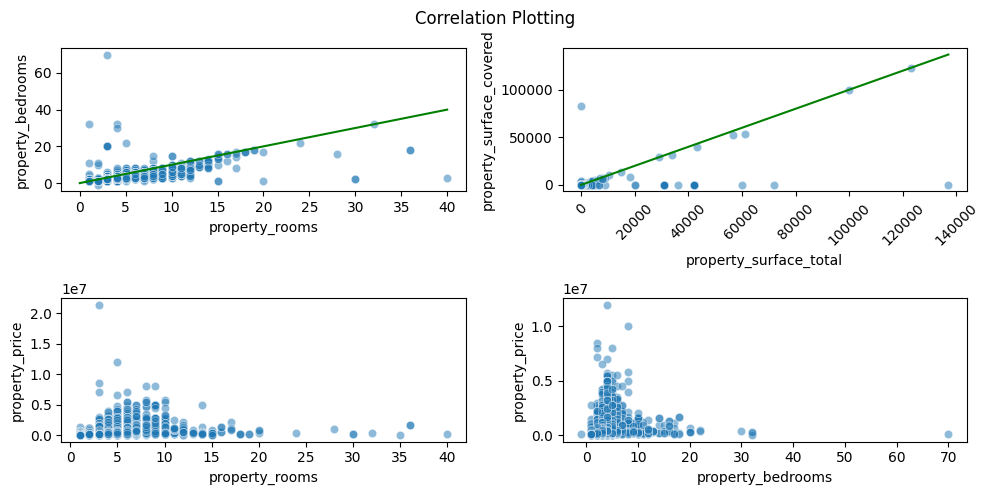

In [19]:
correlacion1 = ds_properati[['property_rooms', 'property_bedrooms']]
max_rooms = correlacion1['property_rooms'].max()

correlacion2 = ds_properati[['property_surface_covered', 'property_surface_total']]
max_surface_total = correlacion2['property_surface_total'].max()

correlacion3 = ds_properati[['property_rooms','property_price']]
correlacion4 = ds_properati[['property_bedrooms','property_price']]

fig, ax = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Correlation Plotting')

sns.scatterplot(x='property_rooms', y='property_bedrooms',data=correlacion1, alpha=0.5, ax = ax[0][0])
sns.lineplot(x=[0,max_rooms], y=[0,max_rooms], c='Green', ax = ax[0][0])

sns.scatterplot(x='property_surface_total', y='property_surface_covered',data=correlacion2, alpha=0.5, ax = ax[0][1])
sns.lineplot(x=[0,max_surface_total], y=[0,max_surface_total], c='Green', ax = ax[0][1])
ax[0][1].tick_params(axis='x', rotation=45)

sns.scatterplot(x='property_rooms', y='property_price',data=correlacion3, alpha=0.5, ax = ax[1][0])

sns.scatterplot(x='property_bedrooms', y='property_price',data=correlacion4, alpha=0.5, ax = ax[1][1])

fig.tight_layout()


### b) Datos faltantes

Calculamos el porcentaje de datos nulos por columna.

In [20]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100
print(nullable_percentages)

start_date                   0.000000
end_date                     5.348598
created_on                   0.000000
latitud                      3.957602
longitud                     3.957602
place_l2                     0.000000
place_l3                     0.442445
place_l4                    96.134707
operation                    0.000000
property_type                0.000000
property_rooms               1.107704
property_bedrooms           11.657418
property_surface_total       5.139577
property_surface_covered     3.558658
property_price               0.000000
property_currency            0.000000
property_title               0.000000
dtype: float64


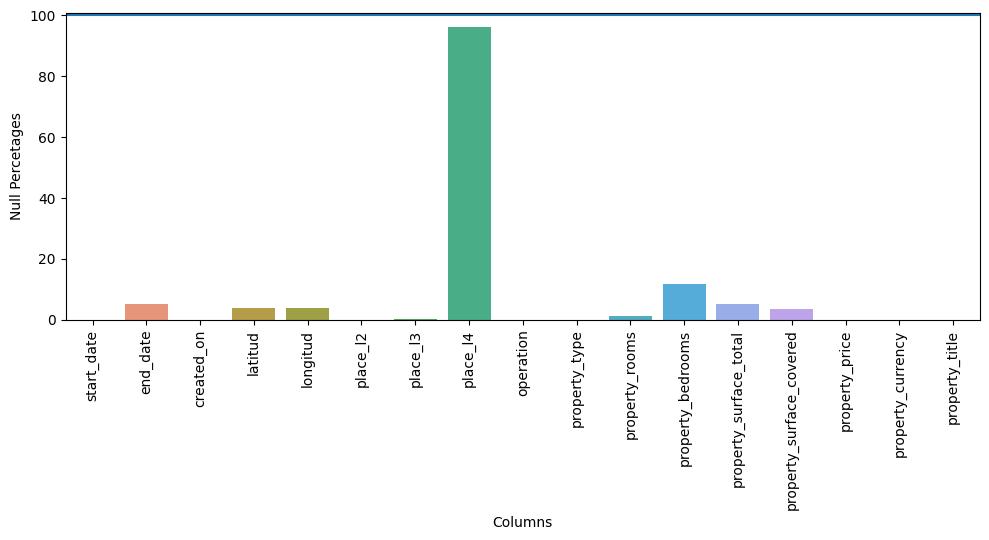

In [21]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100

graph = sns.barplot(x=nullable_percentages.index, y=nullable_percentages.values)
graph.axhline(100)
plt.xticks(rotation=90)
plt.ylabel("Null Percetages")
plt.xlabel("Columns")
plt.tight_layout()

- Podemos observar que la columna place_l4 tiene un porcentaje de nulos de 96.134707% siendo de todas las columnas la que mayor cantidad de nulos posee. Por esto consideramos que no es relevante para nuestro analisis y procederemos a eliminarla.

In [22]:
ds_properati.drop(['place_l4'], axis=1, inplace = True)

Comprobamos que se haya eliminado correctamente

In [23]:
ds_properati.head()

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


In [24]:
# Guardamos el dataset sin l4
ds_properati.to_csv('df_preprocesado_v1.csv', index=False)

Calculamos el porcentaje de datos nulos por fila.

In [25]:
ds=ds_properati.isna().copy()

- Aqui podemos observar cuantos valores nulos tiene cada fila.(True== Nan)

In [26]:
ds.head(10)

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
print("La cantidad de filas que contiene valores nulos son :",ds_properati.isnull().any(axis=1).sum())
nullrowspercentage= (ds_properati.isnull().any(axis=1).sum() / ds_properati.shape[0]) * 100
print("El porcentaje de filas nulas que tiene el dataset es de ",nullrowspercentage,"%")
nullquantityperrow=(ds_properati.isnull().sum(axis=1)).sort_values(ascending=False).value_counts()
print("\n La cantidad de registros que tienen una misma cantidad de nulos \n",nullquantityperrow)
nullperrow= ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100
print("\n El porcentaje de nulos por cada fila es \n",nullperrow)
nullsortedpercentages= (ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100).sort_values(ascending=False).value_counts()
print("\n La cantidad de filas que se tienen un mismo porcentaje \n",nullsortedpercentages)

La cantidad de filas que contiene valores nulos son : 24699
El porcentaje de filas nulas que tiene el dataset es de  26.206113592717163 %

 La cantidad de registros que tienen una misma cantidad de nulos 
 0    69550
1    18101
2     5145
3     1171
4      170
5      110
6        1
7        1
dtype: int64

 El porcentaje de nulos por cada fila es 
 0        18.75
1         0.00
2         0.00
3         6.25
4         6.25
         ...  
94244     0.00
94245     0.00
94246     0.00
94247     0.00
94248     0.00
Length: 94249, dtype: float64

 La cantidad de filas que se tienen un mismo porcentaje 
 0.00     69550
6.25     18101
12.50     5145
18.75     1171
25.00      170
31.25      110
43.75        1
37.50        1
dtype: int64


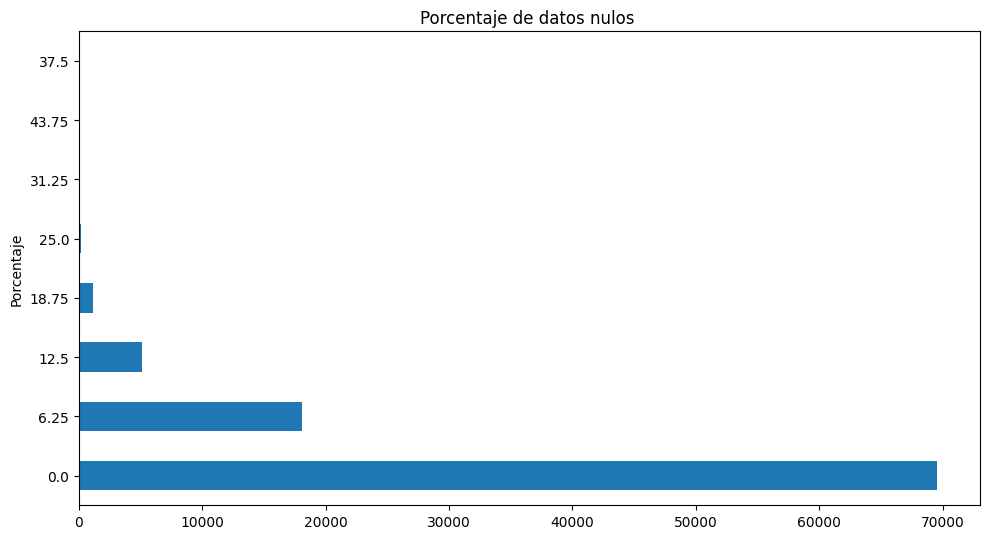

<Figure size 1500x1000 with 0 Axes>

In [28]:
nullsortedpercentages.plot(kind = "barh", title="Porcentaje de datos nulos ", ylabel="Cantidad de registros",xlabel="Porcentaje")
plt.figure(figsize=(15, 10))
plt.show()

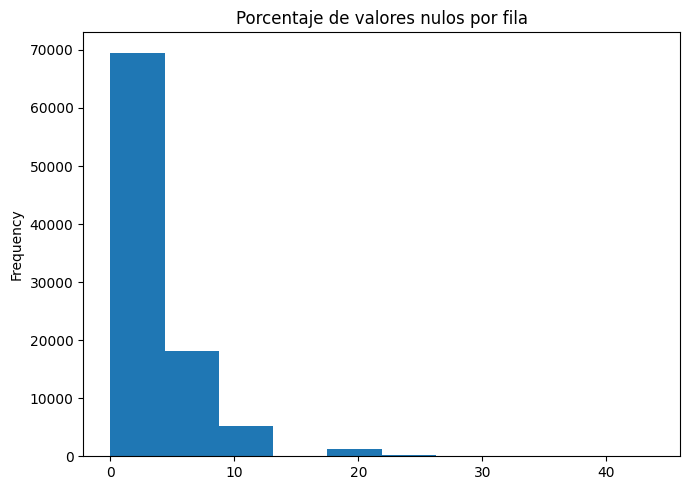

In [29]:
plt.figure(figsize=(7, 5))

nullperrow.sort_values(inplace=True)
nullperrow.plot.hist(bins=10, xlabel='Porcentaje de valores nulos', ylabel='Cantidad de filas', title='Porcentaje de valores nulos por fila')

plt.show()

- Podemos decir que  1 registro tiene 7 valores nulos , 1 registro 6 valores nulos , 110 registros 5 valores nulos , 170 resgistros 4 valores nulos , 1171 registros 3 valores nulos , 5145 registros 2 valores nulos y 18101 1 valor nulo y 69550 registros 0 valores nulos. 
- Hemos tomado como criterio que  aquellos registros que tiene igual o mas de ????? valores nulos seran eliminados ya que al ser tanta la informacion faltante no serian de gran utilidad para nuestro analisis.



Trabajar con datos Faltantes
Criterios:
- Yo diria que si a una fila le faltan mas de 4 datos eliminemos la fila
- Para property_room y property_bedroom podriamos usar imputacion de datos.
- Para property_price y property_currency
- Si hay 3 chequeamos si son latitud y longitud si es asi se elimina 
- Si hay 3 si son rooms y bedrooms se recupera


### c) Valores atípicos

Para detectar valores atipicos se realizarán 2 tipos de analisis:
- El primero correspondiente a detección de outliers de forma univariada.
- El segundo correspondiente a detección de outliers de forma multivariada.

Procedemos con el **primer analisis** graficando distintas variables que consideramos que pueden empezar siendo analizadas de forma **univariada**.

Entre ellas utilizando:
- La cantidad de ambientes, dormitorios, superficie total y superficie cubierta de las propiedades (distinguidos segun tipo de propiedad) [Boxplots]. 
- El precio de las propiedades (distinguidos segun tipo de propiedad) [Boxplots y Z-score modificado]

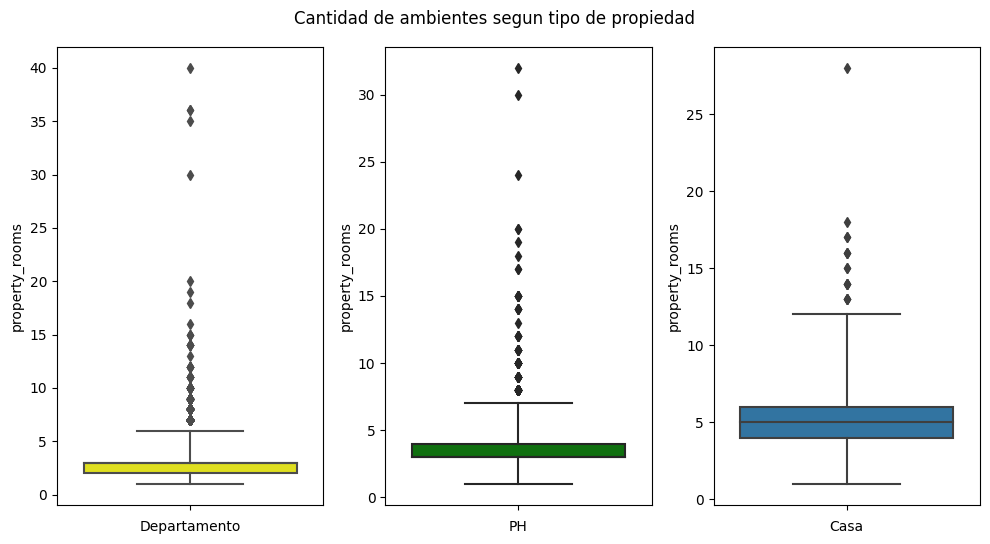

In [30]:
# NOTA [De miguel]: Persisten muchos outliers con rooms aprox > 10 a 15. Tener en cuenta que se intentó arreglar con el parametro whis,
# el cual extiende los maximos y minimos (los bordes del boxplot) hasta un factor de los cuartiles. Por defecto está definido
# como 1.5, lo modifiqué a 3 pero aún siguen quedando muchos valores por fuera del rango.
# Creo que tiene que ver con lo mismo que le viene pasando a la distancia de Mahanalobis de más adelante

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Cantidad de ambientes segun tipo de propiedad')

properties_with_house_type_cond = ds_properati['property_type']  == 'Casa'
sns.boxplot(y='property_rooms',data=ds_properati[properties_with_house_type_cond], whis=3).set(xlabel='Casa')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = ds_properati['property_type']  == 'Departamento'
sns.boxplot(y='property_rooms',data=ds_properati[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = ds_properati['property_type']  == 'PH'
sns.boxplot(y='property_rooms',data=ds_properati[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH')
plt.sca(ax[2])
plt.xticks(rotation=45)


fig.show()


- Podemos observar para las propiedades de tipo casa que hay varios outliers con cantidad de ambientes entre 10 y 20 y un valor excepcional de una casa con 27 ambientes aproximadamente. 
- Podemos observar para las propiedades de tipo departamento que hay varios outliers con cantidad de ambientes entre 5 y 20 , un valor excepcional de un departamento con 30 ambientes , 2 casos de departamentos con 35 ambientes aproximadamente y un ultimo caso de outlier con 40 ambientes.
- Podemos observar para las propiedades de tipo PH que hay varios outliers con cantidad de ambientes entre 6(aproximadamente) y 15, algunos PH con entre 15 y 20 ambientes, 1 caso de 25 ambientes y dos casos de 30 ambientes.

- De esto podemos decir que seguramnete los departamentos, PH , casas  que poseen mas de 10 habitaciones deben ser o un error de carga o puede estra tratandose de un hotel/residencia por ende el gran numero de habitaciones.

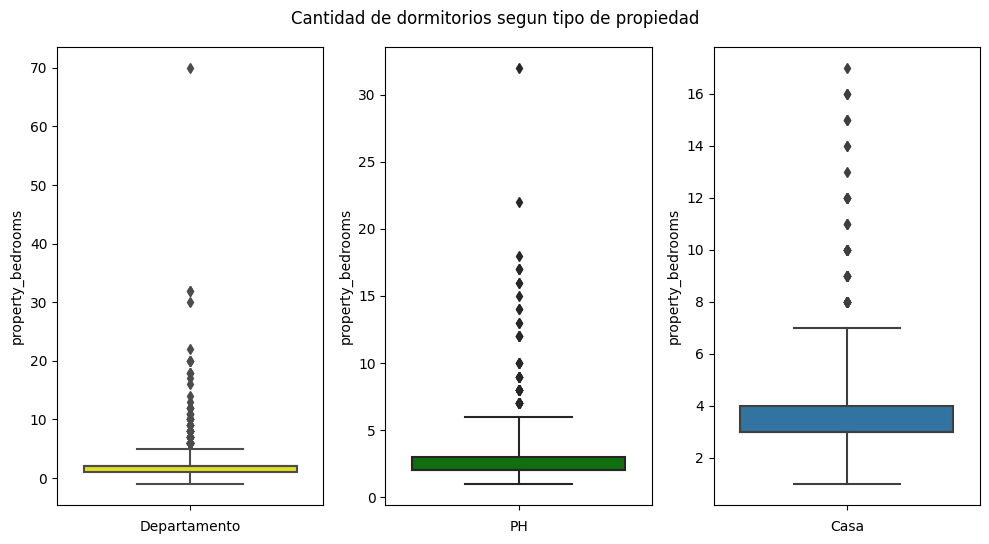

In [31]:
# Nota: mismo problema que la celda de codigo anterior

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Cantidad de dormitorios segun tipo de propiedad')

properties_with_house_type_cond = ds_properati['property_type']  == 'Casa'
sns.boxplot(y='property_bedrooms',data=ds_properati[properties_with_house_type_cond], whis=3).set(xlabel='Casa')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = ds_properati['property_type']  == 'Departamento'
sns.boxplot(y='property_bedrooms',data=ds_properati[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = ds_properati['property_type']  == 'PH'
sns.boxplot(y='property_bedrooms',data=ds_properati[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH')
plt.sca(ax[2])
plt.xticks(rotation=45)


fig.show()

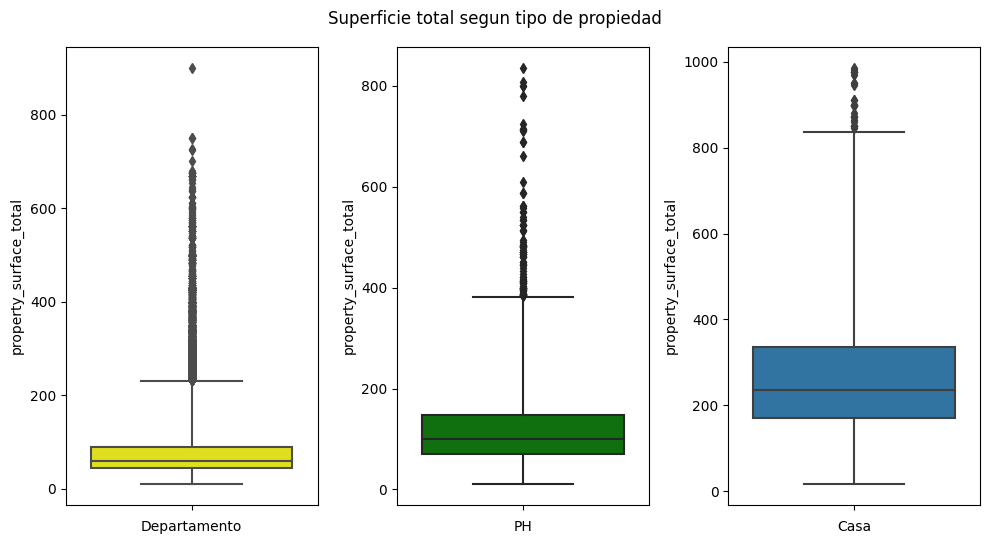

In [32]:
# muchos outliers con valores extremadamente altos
# lo normal maximo es 600 m^2 (aprox)
# (Con los graficos pegados):
# Con los valores extremos:
# sns.boxplot(x='property_type', y='property_surface_total',data=ds_properati)
# Con valores filtrados:  
# sns.boxplot(x='property_type', y='property_surface_total',data=ds_properati[ds_properati['property_surface_total']<1000])

# (  Con los graficos separados y con los datos FILTRADOS ya que de verdad son valores exagerados para visualizar. Si se quiere ver
# como quedan sin filtrar, comentar las condiciones "& (ds_properati['property_surface_total']<1000)"  ): 
# Por ahi lo que se me ocurre es mostrar ambas cosas, los graficos filtrados y los no filtrados para hacer la observacion de que hay
# en general una gran cantidad de outliers que se van a valores horribles

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie total segun tipo de propiedad')

properties_with_house_type_cond = (ds_properati['property_type']  == 'Casa') & (ds_properati['property_surface_total']<1000)
sns.boxplot(y='property_surface_total',data=ds_properati[properties_with_house_type_cond], whis=3).set(xlabel='Casa')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = (ds_properati['property_type']  == 'Departamento') & (ds_properati['property_surface_total']<1000)
sns.boxplot(y='property_surface_total',data=ds_properati[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = (ds_properati['property_type']  == 'PH') & (ds_properati['property_surface_total']<1000)
sns.boxplot(y='property_surface_total',data=ds_properati[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH')
plt.sca(ax[2])
plt.xticks(rotation=45)


fig.show()

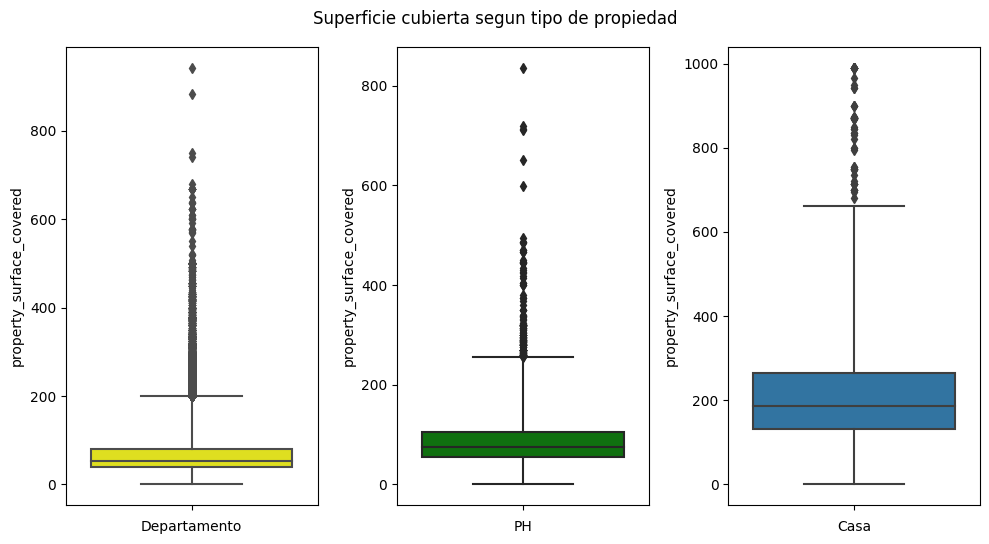

In [33]:
# muchos ouliers
# lo normal maximo es 450 m^2 (aprox)
# (Con los graficos pegados):
# Con todos los valores:
# sns.boxplot(x='property_type', y='property_surface_covered', data=ds_properati)
# Con valores filtrados:
# sns.boxplot(x='property_type', y='property_surface_covered',data=ds_properati[ds_properati['property_surface_covered']<600])

# (Con los graficos separados y con los datos filtrados):
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie cubierta segun tipo de propiedad')

properties_with_house_type_cond = (ds_properati['property_type']  == 'Casa') & (ds_properati['property_surface_covered']<1000)
sns.boxplot(y='property_surface_covered',data=ds_properati[properties_with_house_type_cond], whis=3).set(xlabel='Casa')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = (ds_properati['property_type']  == 'Departamento') & (ds_properati['property_surface_covered']<1000)
sns.boxplot(y='property_surface_covered',data=ds_properati[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = (ds_properati['property_type']  == 'PH') & (ds_properati['property_surface_covered']<1000)
sns.boxplot(y='property_surface_covered',data=ds_properati[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH')
plt.sca(ax[2])
plt.xticks(rotation=45)


fig.show()

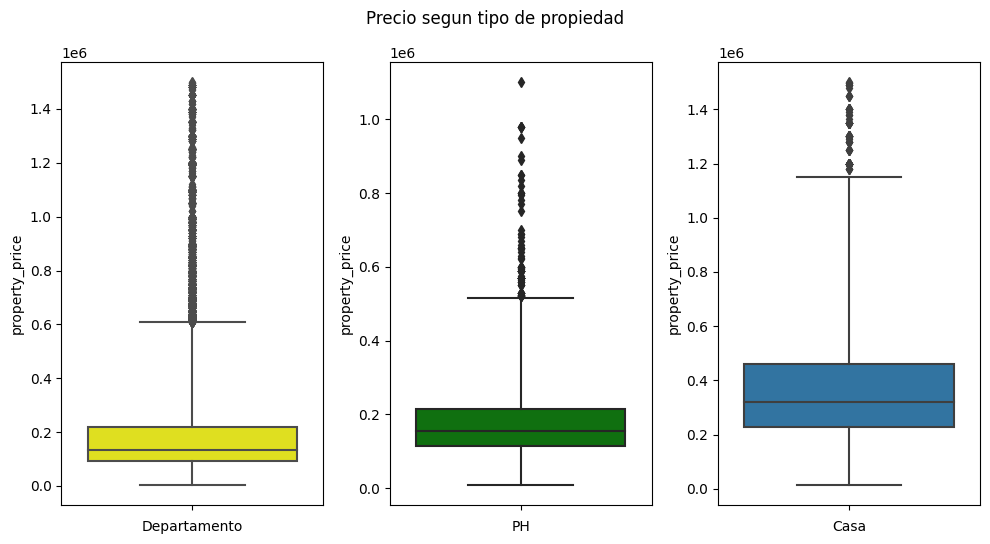

In [34]:
# muchos outliers
# lo normal maximo es 800 000 dolares (aprox)
# (Con los graficos pegados):
# Con todos los valores:
# sns.boxplot(x='property_type', y='property_price', data=ds_properati)
# Con valores filtrados:
# sns.boxplot(x='property_type', y='property_price', data=ds_properati[ds_properati['property_price']<1e6], fliersize=2)

# (Con los graficos separados y con los datos filtrados):
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Precio segun tipo de propiedad')

properties_with_house_type_cond = (ds_properati['property_type']  == 'Casa') & (ds_properati['property_price']<1.5e6)
sns.boxplot(y='property_price',data=ds_properati[properties_with_house_type_cond], whis=3).set(xlabel='Casa')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = (ds_properati['property_type']  == 'Departamento') & (ds_properati['property_price']<1.5e6)
sns.boxplot(y='property_price',data=ds_properati[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = (ds_properati['property_type']  == 'PH') & (ds_properati['property_price']<1.5e6)
sns.boxplot(y='property_price',data=ds_properati[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH')
plt.sca(ax[2])
plt.xticks(rotation=45)


fig.show()


In [35]:
ds_zscore = pd.DataFrame()
ds_zscore['z_score_rooms']=st.zscore(ds_properati.property_rooms, nan_policy='omit')
ds_zscore['z_score_bedrooms']=st.zscore(ds_properati.property_bedrooms, nan_policy='omit')
ds_zscore['z_score_surface_total'] = st.zscore(ds_properati.property_surface_total, nan_policy='omit')
ds_zscore['z_score_surface_covered'] = st.zscore(ds_properati.property_surface_covered, nan_policy='omit')
ds_zscore['z_score_price'] = st.zscore(ds_properati.property_price)

print(ds_properati[ds_zscore['z_score_rooms']>3].shape)
print(ds_properati[ds_zscore['z_score_rooms']<-3].shape)
print()

print(ds_properati[ds_zscore['z_score_bedrooms']>3].shape)
print(ds_properati[ds_zscore['z_score_bedrooms']<-3].shape)
print()

print(ds_properati[ds_zscore['z_score_surface_total']>3].shape)
print(ds_properati[ds_zscore['z_score_surface_total']<-3].shape)
print()

print(ds_properati[ds_zscore['z_score_surface_covered']>3].shape)
print(ds_properati[ds_zscore['z_score_surface_covered']<-3].shape)
print()

print(ds_properati[ds_zscore['z_score_price']>3].shape)
print(ds_properati[ds_zscore['z_score_price']<-3].shape)

ds_zscore.head()

(740, 16)
(0, 16)

(519, 16)
(0, 16)

(59, 16)
(0, 16)

(27, 16)
(0, 16)

(1710, 16)
(0, 16)


,z_score_rooms,z_score_bedrooms,z_score_surface_total,z_score_surface_covered,z_score_price
0,0.825445,0.872195,0.063145,0.045481,-0.050967
1,0.124252,-0.012948,-0.052115,-0.033234,-0.449898
2,0.825445,0.872195,-0.039875,-0.018096,-0.399364
3,0.825445,-0.012948,NaN,0.016215,-0.251845
4,0.825445,-0.012948,NaN,-0.015069,0.074581


[Text(0.5, 0, 'Std deviation'), Text(0, 0.5, 'Property quantity')]

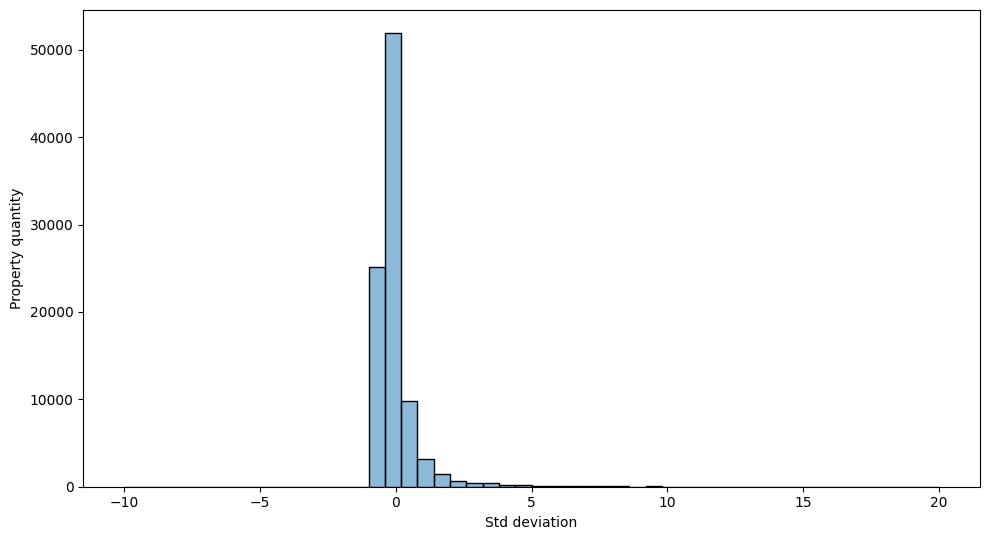

In [36]:
sns.histplot(bins=50, binrange=(-10,20) ,data=ds_zscore['z_score_price'], alpha = 0.5).set(xlabel="Std deviation",ylabel="Property quantity")

NOTAS DE COSAS PENDIENTES: 
- Analisis Univariados que faltan:
    - **[Usando Z-score y/o Z-score modificado]**
    - Precios

- Analisis multivariados que faltan:
    - **[Usando Clustering con distancia de Mahalanobis]**
    - Superficie total con Superficie cubierta 
    - Cantidad de ambientes con Cantidad de dormitorios
    - Precio con cantidad de ambientes (o si se quiere, tambien con cantidad de dormitorios)
    - Precio con superficies (si se quiere tmb con ambas. Este es pedido por el enunciado)

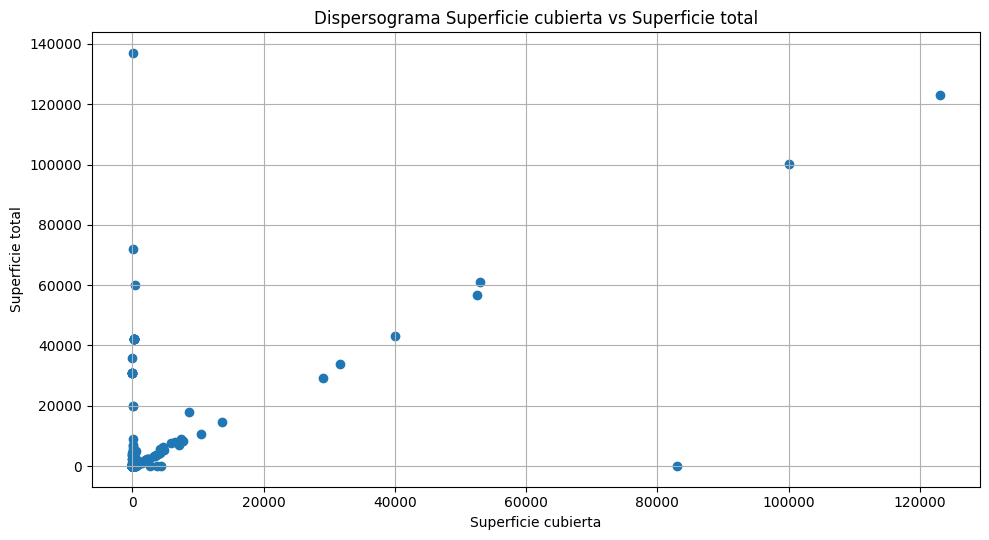

In [37]:
plt.scatter(ds_properati.property_surface_covered, ds_properati.property_surface_total)
plt.title('Dispersograma Superficie cubierta vs Superficie total')
plt.xlabel('Superficie cubierta')
plt.ylabel('Superficie total')
plt.grid()
plt.show()

In [38]:
# ds aux
#ds_mahal = pd.DataFrame()

# Vec de medias
#vmedias=np.mean(ds_properati[['property_surface_covered','property_surface_total']])

# Dif entre las observaciones y el vector de medias
#x_dif = ds_properati[['property_surface_covered','property_surface_total']] - vmedias

# Matriz de covarianza y su inversa
#cov=ds_properati[['property_surface_covered','property_surface_total']].cov().values
#inv_cov = np.linalg.inv(cov)

# Cuadrado de la distancia de mahalanobis
#mahal =np.dot( np.dot(x_dif, inv_cov) , x_dif.T)

#ds_mahal['surfaces']=mahal.diagonal()
#ds_mahal.head()

#No veo por qué esta fallando toda la notebook si se ejecuta esto descomentado. Es traido directamente de la clase en la que se aplica
# la distancia de mahalanobis de forma manual digamos

In [39]:
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

In [40]:
df_outlier_1 = ds_properati[['property_rooms','property_bedrooms']]
print(df_outlier_1.describe())
df_outlier_1 = df_outlier_1.dropna()
df_outlier_1 = df_outlier_1.to_numpy()
# Covariance matrix
covariance  = np.cov(df_outlier_1 , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df_outlier_1 , axis=0)

# Distances between center point and 
distances = []
for i, val in enumerate(df_outlier_1):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.99, df_outlier_1.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])

print('--- Observations found as outlier -----')
print(df_outlier_1[ distances > cutoff , :])


       property_rooms  property_bedrooms
count    93205.000000       83262.000000
mean         2.822799           2.014629
std          1.426148           1.129767
min          1.000000          -1.000000
25%          2.000000           1.000000
50%          3.000000           2.000000
75%          4.000000           3.000000
max         40.000000          70.000000
--- Index of Outliers ----
(array([    9,    95,   105, ..., 82529, 82539, 82583]),)
--- Observations found as outlier -----
[[10. 10.]
 [ 7.  4.]
 [ 7.  4.]
 ...
 [ 6.  3.]
 [ 7.  3.]
 [10.  9.]]


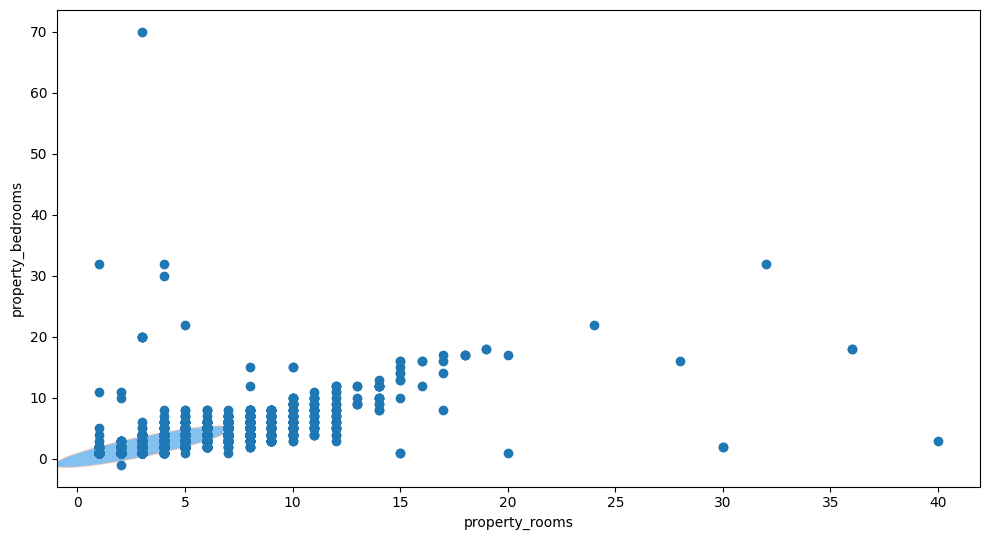

In [41]:
## Finding ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df_outlier_1[: , 0], df_outlier_1[ : , 1])
plt.xlabel("property_rooms")
plt.ylabel("property_bedrooms")
plt.show()

### d) Reducción de la dimensionalidad

(TODO) facu, voy a arrancar esta semana viendo esto, si podemos reducir la cantidad de variables del dataset

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7da1cea6-caf2-4c30-b019-068f1fb82c77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>